In [1]:
%load_ext autoreload
%autoreload 1

import gc
import os
import sys
from pprint import pprint

import googlemaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from scipy.integrate import odeint

main_dir = os.path.abspath(os.pardir)
sys.path.insert(0, main_dir)
from analysis.download_data import jh_git_url, all_files
from covid_forecast.utils import data_prep as dp

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
pd.options.display.precision = 2
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
print(main_dir)

'D:\\Users\\gjnet\\code_projects\\covid_forecast'

# Open files as dataframes
Credit to dgrechka for locations_population. Data[source](https://www.kaggle.com/dgrechka/covid19-global-forecasting-locations-population/metadata)

In [ ]:
locations_population = pd.read_csv(os.path.join(main_dir, "data", "raw", "locations_population.csv"))
friendly_fnames = [file.replace("time_series_covid19_", "").replace(".csv", "") for file in all_files]
filename_dct = dict(zip(friendly_fnames, all_files))
pprint(filename_dct)

In [4]:
df_dct = dict()
for file in filename_dct.keys():
    df_dct[file] = pd.read_csv(jh_git_url+filename_dct[file])  # reads csv from github repo
    exec(file+" = df_dct['"+file+"']")  # creates a reference for friendly_names
    print(file, df_dct[file].shape)
    display(df_dct[file].head(), df_dct[file].describe(include="all"), df_dct[file].dtypes)

confirmed_global (253, 71)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.00,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.15,20.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.03,1.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.51,1.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.20,17.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
count,79,253,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00
unique,79,177,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Xinjiang,China,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,22.15,23.26,2.19,2.58,3.72,5.67,8.37,11.57,22.05,24.37,32.55,39.24,47.58,66.35,78.58,94.43,109.23,121.72,135.93,146.72,158.70,169.02,177.08,178.74,238.61,264.37,272.85,281.52,289.56,296.98,298.97,301.17,303.63,310.56,312.09,314.47,317.81,321.69,327.06,332.46,339.96,349.28,356.94,366.96,375.97,386.90,402.38,418.37,434.08,448.97,468.85,497.53,507.32,573.93,617.00,661.87,717.68,779.06,849.09,958.50,"1,075.24","1,203.15","1,331.83","1,495.00","1,652.35","1,848.43","2,093.25","2,345.02","2,611.49"
std,NaN,NaN,24.40,71.51,27.97,28.07,34.94,48.63,67.95,91.55,224.72,226.08,311.55,369.37,454.54,706.43,853.99,"1,052.52","1,240.33","1,394.31","1,572.91","1,707.95","1,866.95","1,998.70","2,101.65","2,101.99","3,032.92","3,422.22","3,538.04","3,659.48","3,772.99","3,879.34","3,901.29","3,927.09","3,940.98","4,030.27","4,030.30","4,043.11","4,074.50","4,099.87","4,126.14","4,147.11","4,175.64","4,213.77","4,228.98","4,241.62","4,253.29","4,267.68","4,285.26","4,302.96","4,319.71","4,339.56","4,355.90","4,389.81","4,400.27","4,495.48","4,578.94","4,676.24","4,792.33","4,930.50","5,115.87","5,413.20","5,774.34","6,212.53","6,660.13","7,280.53","7,908.34","8,747.75","9,883.87","11,069.65","12,375.14"
min,NaN,NaN,-41.45,-135.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,8.54,-19.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,2.00,3.00,3.00,3.00,5.00,6.00,7.00,9.00,12.00,12.00,14.00
50%,NaN,NaN,23.83,20.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
2/17/20             int64
2/18/20             int64
2/19/20             int64
2/20/20             int64
2/21/20             int64
2/22/20             int64
2/23/20             int64
2/24/20             int64
2/25/20     

deaths_global (253, 71)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.00,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4
1,NaN,Albania,41.15,20.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10
2,NaN,Algeria,28.03,1.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29
3,NaN,Andorra,42.51,1.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3
4,NaN,Angola,-11.20,17.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
count,79,253,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00
unique,79,177,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Xinjiang,China,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,22.15,23.26,0.07,0.07,0.10,0.17,0.22,0.32,0.52,0.53,0.68,0.84,1.02,1.43,1.68,1.94,2.23,2.51,2.84,3.19,3.58,4.00,4.40,4.42,5.42,6.02,6.58,7.00,7.38,7.93,8.39,8.88,8.90,9.72,9.76,10.39,10.70,10.95,11.12,11.35,11.62,11.84,12.19,12.49,12.86,13.23,13.68,14.06,15.03,15.76,16.85,18.24,18.66,21.36,23.00,25.45,28.17,31.25,34.52,39.00,44.66,51.28,57.91,65.24,73.62,83.72,94.74,107.50,121.15
std,NaN,NaN,24.40,71.51,1.07,1.07,1.51,2.52,3.27,4.78,7.86,7.86,10.19,12.83,15.65,22.00,26.03,30.11,34.51,38.85,43.94,49.03,54.75,61.23,67.14,67.14,82.35,91.59,100.33,106.62,112.46,120.76,127.55,134.78,134.78,147.47,147.47,156.84,161.11,164.38,166.02,168.60,171.44,173.58,176.25,178.31,180.64,182.72,184.74,186.71,189.35,191.71,194.80,199.35,200.51,210.44,216.66,229.34,243.53,259.77,282.05,305.27,339.45,384.72,426.53,470.10,522.52,581.75,643.59,719.15,797.71
min,NaN,NaN,-41.45,-135.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,8.54,-19.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,NaN,23.83,20.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
75%,NaN,NaN,41.30,85.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
2/17/20             int64
2/18/20             int64
2/19/20             int64
2/20/20             int64
2/21/20             int64
2/22/20             int64
2/23/20             int64
2/24/20             int64
2/25/20     

recovered_global (239, 71)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.00,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2
1,NaN,Albania,41.15,20.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31
2,NaN,Algeria,28.03,1.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31
3,NaN,Andorra,42.51,1.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.20,17.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
count,64,239,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00
unique,64,177,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Xinjiang,China,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,20.87,29.36,0.12,0.13,0.15,0.16,0.22,0.26,0.45,0.53,0.60,0.93,1.19,1.97,2.61,3.56,4.70,6.22,8.41,10.95,13.57,16.51,19.59,21.55,26.34,33.72,39.31,45.46,52.65,60.05,67.45,76.05,79.04,95.76,97.88,105.55,116.76,127.13,139.23,153.60,166.45,178.73,190.80,201.79,214.10,225.09,233.74,244.18,253.95,261.48,269.47,280.35,285.87,293.94,303.87,318.13,326.73,338.24,348.59,355.54,365.77,383.65,409.62,411.51,451.88,476.10,511.09,547.76,583.33
std,NaN,NaN,24.07,68.09,1.81,1.82,2.01,2.08,2.73,2.93,5.21,5.73,5.89,9.22,11.04,19.28,25.25,34.19,41.67,53.85,73.44,94.96,118.33,146.26,173.58,177.98,227.98,312.67,367.82,433.65,512.94,594.75,673.22,767.31,774.38,994.64,998.11,"1,088.97","1,232.47","1,361.45","1,517.34","1,712.28","1,879.61","2,043.79","2,198.67","2,345.60","2,497.39","2,629.03","2,722.33","2,818.25","2,931.33","3,012.99","3,094.98","3,185.60","3,261.92","3,342.02","3,433.63","3,526.74","3,583.08","3,643.79","3,707.10","3,759.17","3,811.20","3,863.26","3,908.09","3,936.40","3,994.55","4,051.13","4,117.42","4,192.27","4,279.72"
min,NaN,NaN,-41.45,-106.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,7.74,-7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,NaN,22.30,22.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
2/17/20             int64
2/18/20             int64
2/19/20             int64
2/20/20             int64
2/21/20             int64
2/22/20             int64
2/23/20             int64
2/24/20             int64
2/25/20     

In [5]:
# Start timer
start_time = pd.to_datetime("now")
time_fmt = "%d/%m/%Y %H:%M:%S"
print("INFO: start time", start_time.strftime(time_fmt))

# Filling missing province/state where possible
gmaps = googlemaps.Client(key=os.getenv("gmaps_api_key"))

match_keys = ["Province/State", "Country/Region", "Lat", "Long"]
fillna_keys = ["Province/State", "Country/Region"]
prov_state_vname = "Province/State"
country_region_vname = "Country/Region"
loc_admin_long_vname = "long_name"

# Start with the first df with missing province/state values
temp_df = confirmed_global[match_keys][confirmed_global[prov_state_vname].isna()].copy()

for i in temp_df.index:
    row = temp_df.loc[i]

    # Look up an address with reverse geocoding
    try:
        target_loc = gmaps.reverse_geocode((row["Lat"], row["Long"]))[0]['address_components']
    except IndexError:
        continue
    admin_ind = dp.find_admin_loc(target_loc)
    if admin_ind is not None:
        temp_df.loc[i, prov_state_vname] = target_loc[dp.find_admin_loc(target_loc)][loc_admin_long_vname]
    
    # Fill missing with country/region
    temp_df[prov_state_vname] = temp_df[prov_state_vname].fillna(temp_df[country_region_vname])

# Fillna missing values
for df in df_dct.keys():
    df_dct[df][fillna_keys] = confirmed_global[fillna_keys].fillna(temp_df[fillna_keys])

# Finish time
finish_time = pd.to_datetime("now")
elapsed_time_min = round((finish_time-start_time).total_seconds()/60, 2)
print("INFO: finished. This took", elapsed_time_min, "minutes.")

INFO: start time 29/03/2020 00:26:08
INFO: finished. This took 0.13 minutes.


In [6]:
# Population df formatting
# Credit to lisphilar. Source code: https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model
df = locations_population.copy()
df = df.rename({"Province.State": "Province", "Country.Region": "Country"}, axis=1)
cols = ["Country", "Province", "Population"]
df = df.loc[:, cols].fillna("-")
df.loc[df["Country"] == df["Province"], "Province"] = "-"

# Add total records
_total_df = df.loc[df["Province"] != "-", :].groupby("Country").sum()
_total_df = _total_df.reset_index().assign(Province="-")
df = pd.concat([df, _total_df], axis=0, sort=True)
df = df.drop_duplicates(subset=["Country", "Province"], keep="first")

# Global
global_value = df.loc[df["Province"] == "-", "Population"].sum()
df = df.append(pd.Series(["Global", "-", global_value], index=cols), ignore_index=True)

# Global except China
china_value = df.loc[(df["Country"] == "China") & (df["Province"] == "-"), "Population"].sum()
except_china_value = global_value - china_value
df = df.append(pd.Series(["Except China", "-", except_china_value], index=cols), ignore_index=True)

# Sorting
df = df.sort_values("Population", ascending=False).reset_index(drop=True)
df = df.loc[:, cols]
population_df = df.copy()
population_df.head()

,Country,Province,Population
0,Global,-,7067093478
1,Except China,-,5690286216
2,China,-,1376807262
3,India,-,1339000000
4,US,-,327200000


In [9]:
df_dct = dp.bulk_reduce_mem(df_dct)
population_df = population_df.pipe(dp.reduce_mem)
gc.collect()

30

# SIR
[Source code](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

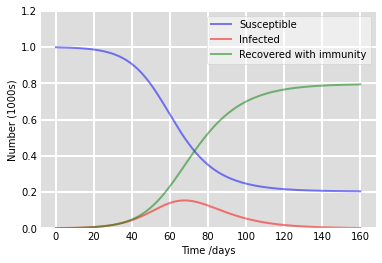

In [14]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate (aka beta), and mean recovery rate aka (gamma) both (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_facecolor('#dddddd')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()